Single-source model geometry
====

Plot a figure showing the geometry of the simple single-source model.

In [1]:
from string import ascii_lowercase
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from sbp_modelling.single_source_deep.model import SingleSourceModel
from sbp_modelling.single_source_deep.forward_model import source_xz

plt.style.use('./mpl/manuscript.mplstyle')

SBP_CACHE_PATH unset


Operator `initdamp` ran in 0.02 s
Operator `pad_lam` ran in 0.01 s
Operator `pad_mu` ran in 0.01 s
Operator `pad_b` ran in 0.01 s


400


In [2]:
a_x, a_z, seed = 2, 0.1, 1001
model = SingleSourceModel(a_x, a_z, seed)
waterbottom, mtd_top, mtd_base = model.horizons()

SBP_CACHE_PATH unset


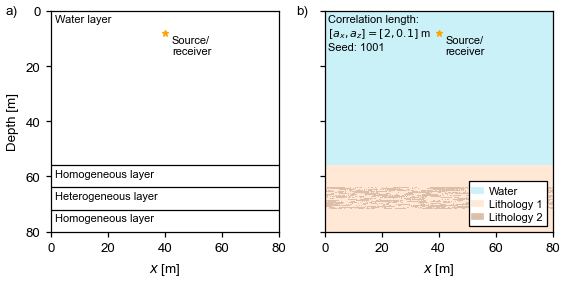

In [3]:
fig, ax = plt.subplots(1, 2, sharey=True)
for horizon in waterbottom, mtd_top, mtd_base:
    ax[0].axhline(horizon, color='k')
cmap = ListedColormap(['#caf0f8', '#ffe8d6', '#ddbea9',])
#cmap = ListedColormap(['white', 'black'])

realisation = ax[1].pcolormesh(
    model.x, model.z, model.realize_model().T,
    shading='nearest', cmap=cmap, rasterized=True
)

ax[0].set_xlim(model.x.min(), model.x.max())
ax[0].set_ylim(model.z.min(), model.z.max())
ax[0].invert_yaxis()
ax[0].set(ylabel='Depth [m]',
          xticks=np.linspace(model.x.min(), model.x.max(), 5),
          yticks=np.linspace(model.z.min(), model.z.max(), 5))
for i in 0, 1:
    ax[i].set(xlabel='$x$ [m]')
    ax[i].plot(*source_xz, '*', color='orange')
    ax[i].annotate('Source/\nreceiver', xy=source_xz,
                   xytext=(4, -1), textcoords='offset points', va='top', ha='left', fontsize='small')

labels = {
    0: 'Water layer',
    waterbottom: 'Homogeneous layer',
    mtd_top: 'Heterogeneous layer',
    mtd_base: 'Homogeneous layer',
}
for z, label in labels.items():
    ax[0].annotate(label, xy=(0, z), xytext=(2, -2), textcoords='offset points', va='top', fontsize='small')


ax[1].annotate(f'Correlation length:\n$[a_x, a_z]=[{a_x}, {a_z}]$ m\nSeed: {seed}', xy=(0, model.z.min()),
               va='top', ha='left', xytext=(2, -2), textcoords='offset points', fontsize='small')

lithologies = [
    Line2D([0], [0], color=cmap(-1.), lw=4),
    Line2D([0], [0], color=cmap(0.5), lw=4),
    Line2D([0], [0], color=cmap(1.), lw=4)
]
ax[1].legend(lithologies, ['Water', 'Lithology 1', 'Lithology 2'], loc='lower right', fontsize='small')

for i in 0, 1:
    if i == 0:
        offset = (-20, 0)
    else:
        offset = (-10, 0)
    ax[i].annotate(f'{ascii_lowercase[i]})', xy=(0, 0), xytext=offset, textcoords='offset points', va='center', ha='right')

In [4]:
fig.savefig('../../manuscript/figures/si_fig11.pdf')